# Obligatorio - Taller de Deep Learning

**Fecha de entrega:** 3/12/2025  
**Puntaje máximo:** 50 puntos

**Alumno(s):** [Nombre(s) y Apellido(s)]

## Obligatorio

El objetivo de este obligatorio es evaluar su conocimiento en Deep Learning mediante la implementación completa de un modelo de segmentación de imágenes basado en el paper [**"U-Net: Convolutional Networks for Biomedical Image Segmentation"**](https://arxiv.org/pdf/1505.04597). Toda la implementación debe realizarse desde cero utilizando PyTorch, y los estudiantes tendrán la libertad de ajustar ciertos hiperparámetros y configuraciones mientras mantengan la esencia del paper original.

### **Competencia en Kaggle**

Además, como parte de este obligatorio, participarán en una competencia privada en Kaggle donde se les proporcionará un dataset de test oculto (sin target). Deberán subir sus predicciones a Kaggle y se evaluarán en función de la métrica **Dice Coefficient (Coeficiente de Dice)**. Esta competencia les permitirá comparar sus resultados con los de sus compañeros en un entorno real de evaluación.

### **¿Qué es el Dice Coefficient?**
El **Dice Coefficient**, también conocido como F1-score para segmentación, es una métrica utilizada para evaluar la similitud entre la predicción y la verdad del terreno en tareas de segmentación. Se define de la siguiente manera:

$$
\text{Dice} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

Donde:
- $A$ es el conjunto de píxeles predichos como pertenecientes a la clase positiva.
- $B$ es el conjunto de píxeles verdaderos pertenecientes a la clase positiva.
- $|A \cap B|$ es la intersección de $A$ y $B$, es decir, los píxeles correctamente predichos como positivos.

Un valor de Dice de **1** indica una predicción perfecta, mientras que un valor de **0** indica que no hay coincidencia entre la predicción y el valor verdadero. Durante la competencia de Kaggle, deberán obtener un puntaje de al menos **0.75** en la métrica Dice para considerarse aprobados.

### **Criterios a Evaluar**

1. **Análisis del Dataset (5 puntos):**
   - Exploración y visualización del dataset para comprender su estructura y características.
   - Justificación de las decisiones tomadas en la preprocesamiento de datos, como normalización, aumento de datos (data augmentation), y partición del dataset en conjuntos de entrenamiento, validación y prueba.

2. **Implementación Correcta del Modelo U-Net (20 puntos):**
   - Construcción de la arquitectura U-Net siguiendo la estructura descrita en el paper, permitiendo ajustes como el número de filtros, funciones de activación y métodos de inicialización de pesos.
   - Se aceptan mejoras como el uso de técnicas adicionales como batch normalization, otras funciones de activación, etc.

3. **Entrenamiento del Modelo (10 puntos):**
   - Configuración adecuada del ciclo de entrenamiento, incluyendo la elección de la función de pérdida y del optimizador (Adam, SGD, etc.).
   - Uso de técnicas de regularización para mejorar la generalización del modelo, como el dropout, normalización de batch y data augmentation.
   - Gráficas y análisis de la evolución del entrenamiento, mostrando las curvas de pérdida y métricas relevantes tanto en el conjunto de entrenamiento como en el de validación.
   - Puede utilizarse experimentación con hiperparámetros con Weights & Biases (W&B) para optimizar el rendimiento del modelo. Este punto no es obligatorio, pero se valorará positivamente si se justifica su uso y se presentan resultados claros.

4. **Evaluación de Resultados (10 puntos):**
   - Evaluación exhaustiva del modelo utilizando métricas de segmentación como **Dice Coefficient**.
   - Análisis detallado de los resultados, incluyendo un análisis de errores para identificar y discutir casos difíciles.
   - Visualización de ejemplos representativos de segmentaciones correctas e incorrectas, comparando con las etiquetas manuales proporcionadas en el dataset.

5. **Participación y Resultados en la Competencia Kaggle (5 puntos):**
   - Participación activa en la competencia de Kaggle, con al menos una (1) subida de predicción.
   - Puntaje obtenido en la tabla de posiciones de Kaggle, evaluado en base al **Dice Coefficient** en el conjunto de test oculto. Es necesario obtener al menos un valor de **0.75** para esta métrica.

   Notas: 
   - **Cualquier decisión debe ser justificada en el notebook.**
   - El **Dice Coefficient** es la métrica utilizada para evaluar la precisión de los modelos de segmentación de imágenes en esta competencia.

### **Run-Length Encoding (RLE)**

Dado que no se suben las imágenes segmentadas directamente a Kaggle, se requiere usar **Run-Length Encoding (RLE)** para comprimir las máscaras de predicción en una cadena de texto que será evaluada. El **RLE** es una técnica de compresión donde se representan secuencias consecutivas de píxeles en formato `start length`, indicando la posición de inicio y la longitud de cada secuencia de píxeles positivos.

Para calcular el **RLE**, se sigue el siguiente proceso:

1. Se aplanan las máscaras predichas en un solo vector
2. Se identifican los píxeles con valor positivo (1) y se calculan las secuencias consecutivas.
3. Se registra la posición de inicio de cada secuencia y su longitud en formato `start length`.

Este formato comprimido se sube a Kaggle en lugar de las imágenes segmentadas.

#### **Ejemplo de RLE**

```python
import numpy as np

def rle_encode(mask):
    pixels = np.array(mask).flatten(order='F')  # Aplanar la máscara en orden Fortran
    pixels = np.concatenate([[0], pixels, [0]])  # Añadir ceros al principio y final
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Encontrar transiciones
    runs[1::2] = runs[1::2] - runs[::2]  # Calcular longitudes
    return ' '.join(str(x) for x in runs)

mask = np.array([[0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 0],
                 [1, 1, 1, 0, 0],
                 [0, 0, 0, 1, 1]])

print(rle_encode(mask))
```

> **Salida:** 3 1 6 2 9 3 14 1 16 1 20 1


### **Sobre el Dataset**

El dataset proporcionado para esta tarea incluirá imágenes y máscaras para la segmentación de un conjunto específico de clases. El conjunto de entrenamiento estará disponible para su uso durante todo el proceso de desarrollo y pruebas, mientras que el conjunto de validación se mantendrá oculto para la evaluación final en Kaggle.

### **Instrucciones de Entrega**

- Deberán entregar un Jupyter Notebook (.ipynb) que contenga todo el código y las explicaciones necesarias para ejecutar la implementación, el entrenamiento y la evaluación del modelo.
- El notebook debe incluir secciones bien documentadas explicando las decisiones de diseño del modelo, los experimentos realizados, y los resultados obtenidos.
- El código debe estar escrito de manera clara.
- La entrega debe realizarse a través de la plataforma de gestión de ORT (gestion.ort.edu.uy) antes de la fecha límite.

### **Materiales Adicionales**

Para facilitar su trabajo, pueden consultar los siguientes recursos:

- [U-Net: Convolutional Networks for Biomedical Image Segmentation (paper original)](https://arxiv.org/abs/1505.04597)
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Tutoriales y recursos adicionales en Kaggle](https://www.kaggle.com/)
- [Convolución Transpuesta](https://d2l.ai/chapter_computer-vision/transposed-conv.html)

### **Competencia Kaggle**

[Link a la competencia Kaggle](https://www.kaggle.com/competitions/tdl-obligatorio-2025)

---

## **1. Exploración de los datos**
En esta etapa, exploramos y analizamos la composición del dataset. Para guiarnos en el preprocesamiento y en el entrenamiento.

### Bibliotecas y funciones

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import albumentations as A
from albumentations.pytorch import ToTensorV2
from Utils import visualizar_predicciones, train, train_full, mask_to_rle

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

Usando dispositivo: cuda


In [21]:
DATA_DIR = "./data" 
TRAIN_IMG_DIR = os.path.join(DATA_DIR, "train", "images")
TRAIN_MASK_DIR = os.path.join(DATA_DIR, "train", "masks")
TEST_IMG_DIR  = os.path.join(DATA_DIR, "test", "images")

In [22]:
print(os.listdir(DATA_DIR))
print("Ejemplo imágenes:", os.listdir(TRAIN_IMG_DIR)[:5])
print("Ejemplo masks:", os.listdir(TRAIN_MASK_DIR)[:5])
print("Cantidad de imágenes de train:", len(os.listdir(TRAIN_IMG_DIR)))
print("Cantidad de máscaras de train:", len(os.listdir(TRAIN_MASK_DIR)))

['test', 'train']
Ejemplo imágenes: ['1.png', '10.png', '100.png', '1000.png', '1001.png']
Ejemplo masks: ['1.png', '10.png', '100.png', '1000.png', '1001.png']
Cantidad de imágenes de train: 2133
Cantidad de máscaras de train: 2133


Imagen shape: (800, 800, 3)
Máscara shape: (800, 800, 3)
Valores únicos de la máscara: [0 1]


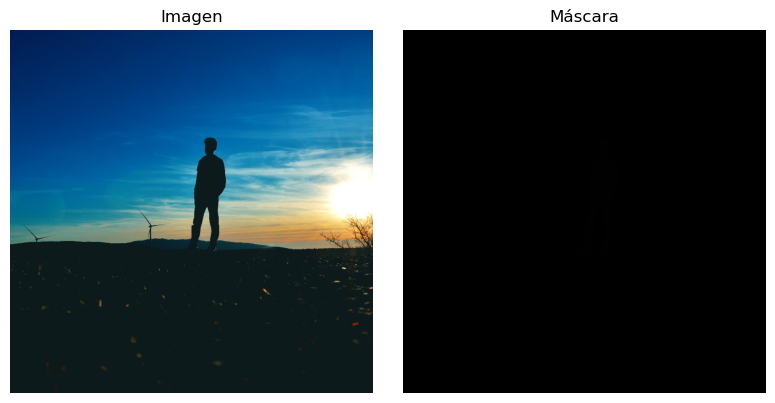

In [23]:
img_name = os.listdir(TRAIN_IMG_DIR)[0]

img_path = os.path.join(TRAIN_IMG_DIR, img_name)
mask_path = os.path.join(TRAIN_MASK_DIR, img_name)

img = np.array(Image.open(img_path))
mask = np.array(Image.open(mask_path))

print("Imagen shape:", img.shape)
print("Máscara shape:", mask.shape)
print("Valores únicos de la máscara:", np.unique(mask))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Imagen"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(mask, cmap="gray"); plt.title("Máscara"); plt.axis("off")
plt.tight_layout()
plt.show()

In [24]:
shapes_img = set()
shapes_mask = set()

for name in tqdm(os.listdir(TRAIN_IMG_DIR)):
    img = np.array(Image.open(os.path.join(TRAIN_IMG_DIR, name)))
    mask = np.array(Image.open(os.path.join(TRAIN_MASK_DIR, name)))
    shapes_img.add(img.shape)
    shapes_mask.add(mask.shape)

print("Shapes de imágenes:", shapes_img)
print("Shapes de máscaras:", shapes_mask)

100%|██████████| 2133/2133 [00:35<00:00, 59.79it/s]

Shapes de imágenes: {(800, 800, 3), (800, 800, 4), (800, 800)}
Shapes de máscaras: {(800, 800, 3)}


## Conclusiones de la exploración de los datos

Del set de entrenamiento:

- Misma cantidad de imágenes y máscaras.
- Los nombres de archivo de imágenes y máscaras coinciden, estan emparejadas de manera correcta.
- Imágenes con shapes: `(800, 800, 3)`, `(800, 800, 4)` y `(800, 800)`.
- Máscaras siempre con shape: `(800, 800, 3)`.
- Valores binarios en máscaras, confirmando que son máscaras binarias.

Considerando lo anterior, tomamos las siguientes decisiones para el preprocesamiento:

- Unificar todas las imágenes a formato RGB para que el modelo reciba siempre tensores con la misma cantidad de canales.
- Convertir las máscaras de `(800, 800, 3)` a una matriz 2D `(800, 800)`, utilizando únicamente uno de los canales. Lo hacemos porque las máscaras crudas están duplicadas en los 3 canales, evitamos redundancia y simplificamos la codificación.

## **2. Preprocesamiento de las imágenes**
El objetivo de esta etapa es: 
- Estandarizar la resolución de las imágenes.
- Normalizar la entrada.
- Validar máscaras binarias en un solo canal.
- Estandarizar los canales de imágenes a formato RGB.
- Dividir el subconjunto de entrenamiento.

Inicialmente, probamos sin aumentaciones complejas. Luego las iremos probando de a una.

Por último, para las aumentaciones, usamos la biblioteca `albumentations`, en vez de `transforms` de torchvision. Porque al investigar, encontramos que es más rápida y eficiente.

In [ ]:
IMG_SIZE = 256

train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

class SegmentationDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None, filenames=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform

        all_imgs = sorted(os.listdir(img_dir))
        if filenames is None:
            self.filenames = all_imgs
        else: # conjunto especifico caso val y train
            self.filenames = sorted(list(filenames)) 

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        file_name = self.filenames[idx]

        img_path = os.path.join(self.img_dir, file_name)
        mask_path = os.path.join(self.mask_dir, file_name)

        img_pil = Image.open(img_path).convert("RGB") # Fuerzo imagen a 3 canales
        img = np.array(img_pil) # (H, W, 3)

        mask_pil = Image.open(mask_path).convert("L") # Fuerzo mascara a escala de grises
        mask = np.array(mask_pil) # (H, W)

        mask = (mask > 0).astype("float32") # Binarizamos la mascara

        if self.transform is not None:
            augmented = self.transform(image=img, mask=mask)
            img = augmented["image"] # Tensor [C, H, W]
            mask = augmented["mask"]
        else:
            img = torch.from_numpy(img.transpose(2, 0, 1)).float() / 255.0
            mask = torch.from_numpy(mask)

        # Mascara esperada en [1, H, W]
        if mask.ndim == 2: # Si es [H, W]
            mask = mask.unsqueeze(0) # [1, H, W]

        return img, mask

In [26]:
all_files = np.array(sorted(os.listdir(TRAIN_IMG_DIR)))
print("Total de imágenes:", len(all_files))

val_ratio = 0.2
n_total = len(all_files)
n_train = int(n_total * (1 - val_ratio))

np.random.shuffle(all_files) # Para evitar sesgo en el split

train_files = all_files[:n_train]
val_files = all_files[n_train:]

print(f"Train: {len(train_files)}")
print(f"Val:   {len(val_files)}")

train_dataset = SegmentationDataset(
    img_dir=TRAIN_IMG_DIR,
    mask_dir=TRAIN_MASK_DIR,
    transform=train_transform,
    filenames=train_files
)

val_dataset = SegmentationDataset(
    img_dir=TRAIN_IMG_DIR,
    mask_dir=TRAIN_MASK_DIR,
    transform=val_transform,
    filenames=val_files
)

BATCH_SIZE = 4

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

Total de imágenes: 2133
Train: 1706
Val:   427


### Batch de prueba
Probamos un batch para ver que se aplicaron correctamente las transformaciones. Y que los tensores tiene los shapes esperados.

In [27]:
imgs, masks = next(iter(train_loader))
print("Batch imgs:", imgs.shape)
print("Batch masks:", masks.shape)

Batch imgs: torch.Size([4, 3, 256, 256])
Batch masks: torch.Size([4, 1, 256, 256])


## **3. Definición del modelo U-Net**

### Primera versión de modelo U-Net
Similar al paper, 4 capas, sin cambios de activacion, dropout o inicializacion de pesos.

In [ ]:
class DoubleConv(nn.Module):
    """(Conv2d + BN + ReLU) x 2"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),

            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling + maxpool + doble conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling + doble conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels)
        else:
            self.up = nn.ConvTranspose2d(in_channels // 2, in_channels // 2,
                                         kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # Ajustamos tamaños por si hay diferencias
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=1, base_channels=64, bilinear=True):
        super().__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc   = DoubleConv(n_channels, base_channels)
        self.down1 = Down(base_channels, base_channels * 2)
        self.down2 = Down(base_channels * 2, base_channels * 4)
        self.down3 = Down(base_channels * 4, base_channels * 8)

        factor = 2 if bilinear else 1
        self.down4 = Down(base_channels * 8, (base_channels * 16) // factor)

        self.up1 = Up(base_channels * 16, base_channels * 8 // factor, bilinear)
        self.up2 = Up(base_channels * 8,  base_channels * 4 // factor, bilinear)
        self.up3 = Up(base_channels * 4,  base_channels * 2 // factor, bilinear)
        self.up4 = Up(base_channels * 2,  base_channels, bilinear)

        self.outc = OutConv(base_channels, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)

        x = self.up1(x5, x4)
        x = self.up2(x,  x3)
        x = self.up3(x,  x2)
        x = self.up4(x,  x1)
        logits = self.outc(x)
        return logits

UNet creado en cuda


### Segunda versión de modelo U-Net
4 capas, son posible cambio de activacion, con posibilidad de dropout e inicializacion de pesos.

In [ ]:
def get_activation(name: str):
    name = name.lower()
    if name == "relu":
        return nn.ReLU(inplace=True)
    elif name == "leaky_relu":
        return nn.LeakyReLU(negative_slope=0.01, inplace=True)
    elif name == "elu":
        return nn.ELU(inplace=True)
    else:
        raise ValueError(f"Función de activación desconocida: {name}")

class DoubleConv_2(nn.Module):
    """(Conv2d + BN + ReLU) x 2"""
    def __init__(
        self,
        in_channels,
        out_channels,
        activation: str = "relu",
        use_dropout: bool = False,
        p_dropout: float = 0.5,
    ):
        super().__init__()
        act = get_activation(activation)

        layers = [
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            act,
        ]

        if use_dropout:
            layers.append(nn.Dropout2d(p_dropout))

        layers += [
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            act,
        ]

        if use_dropout:
            layers.append(nn.Dropout2d(p_dropout))

        self.double_conv = nn.Sequential(*layers)

    def forward(self, x):
        return self.double_conv(x)

class Down_2(nn.Module):
    """Downscaling + maxpool + doble conv"""
    def __init__(self, in_channels, out_channels, activation="relu", use_dropout=False):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv_2(in_channels, out_channels,
                       activation=activation, use_dropout=use_dropout),
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up_2(nn.Module):
    """Upscaling + doble conv"""
    def __init__(
        self,
        in_channels,
        out_channels,
        bilinear=True,
        activation="relu",
        use_dropout=False,
    ):
        super().__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
            self.conv = DoubleConv_2(
                in_channels, out_channels,
                activation=activation, use_dropout=use_dropout
            )
        else:
            self.up = nn.ConvTranspose2d(
                in_channels // 2, in_channels // 2,
                kernel_size=2, stride=2
            )
            self.conv = DoubleConv_2(
                in_channels, out_channels,
                activation=activation, use_dropout=use_dropout
            )

    def forward(self, x1, x2):
        x1 = self.up(x1)

        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(
            x1,
            [diffX // 2, diffX - diffX // 2,
             diffY // 2, diffY - diffY // 2]
        )

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv_2(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


def init_weights(model, mode="kaiming"):
    """Inicializacion de pesos"""
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            if mode == "kaiming":
                nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
            elif mode == "xavier":
                nn.init.xavier_normal_(m.weight)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.ones_(m.weight)
            nn.init.zeros_(m.bias)

class UNet_2(nn.Module):
    def __init__(
        self,
        n_channels=3,
        n_classes=1,
        base_channels=64,
        bilinear=True,
        activation="relu",
        use_dropout=False,
        weight_init: str | None = "kaiming",
    ):
        super().__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc   = DoubleConv_2(n_channels, base_channels,
                                activation=activation, use_dropout=use_dropout)
        self.down1 = Down_2(base_channels, base_channels * 2,
                          activation=activation, use_dropout=use_dropout)
        self.down2 = Down_2(base_channels * 2, base_channels * 4,
                          activation=activation, use_dropout=use_dropout)
        self.down3 = Down_2(base_channels * 4, base_channels * 8,
                          activation=activation, use_dropout=use_dropout)

        factor = 2 if bilinear else 1
        self.down4 = Down_2(base_channels * 8,
                          (base_channels * 16) // factor,
                          activation=activation, use_dropout=use_dropout)

        self.up1 = Up_2(base_channels * 16, base_channels * 8 // factor,
                      bilinear=bilinear, activation=activation, use_dropout=use_dropout)
        self.up2 = Up_2(base_channels * 8, base_channels * 4 // factor,
                      bilinear=bilinear, activation=activation, use_dropout=use_dropout)
        self.up3 = Up_2(base_channels * 4, base_channels * 2 // factor,
                      bilinear=bilinear, activation=activation, use_dropout=use_dropout)
        self.up4 = Up_2(base_channels * 2, base_channels,
                      bilinear=bilinear, activation=activation, use_dropout=use_dropout)
        self.outc = OutConv_2(base_channels, n_classes)

        if weight_init is not None and weight_init.lower() != "none":
            init_weights(self, mode=weight_init)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)

        x = self.up1(x5, x4)
        x = self.up2(x,  x3)
        x = self.up3(x,  x2)
        x = self.up4(x,  x1)
        logits = self.outc(x)
        return logits

## **4. Entrenamiento**

### Entrenamiento 1 con U-Net v1
Primera versión del modelo U-Net, sin augmentacion de datos.

In [ ]:
model = UNet(n_channels=3, n_classes=1, base_channels=64).to(device)
print(model.__class__.__name__, "creado en", device)

In [18]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

history = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=25,
    best_model_path="best_unet.pth"
)

  0%|          | 0/25 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
visualizar_predicciones(model, val_loader, device, "best_unet_1.pth", n_show=4)

### Entrenamiento 2 con U-Net v2
Segunda version del modelo con dropout, con activacion ReLu y kaiming para iniciacion de pesos. Kaiming se empareja bien con activaciones ReLu.

In [ ]:
model = UNet_2(
    n_channels=3,
    n_classes=1,
    base_channels=64,
    bilinear=True,
    activation="relu",
    use_dropout=True,
    weight_init="kaiming",
).to(device)

print(model.__class__.__name__, "creado en", device)

UNet_2 creado en cuda


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

history_2 = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=20,
    best_model_path="best_unet_2.pth"
)

  5%|▌         | 1/20 [02:19<44:13, 139.67s/it]

Epoch 1/20 | Train Loss: 0.8129 | Train Dice: 0.3997 | Val Loss: 0.6837 | Val Dice: 0.4551
  >> Nuevo mejor modelo! Val Dice = 0.4551 guardado en best_unet_2.pth


 10%|█         | 2/20 [04:54<44:31, 148.43s/it]

Epoch 2/20 | Train Loss: 0.8220 | Train Dice: 0.3968 | Val Loss: 0.6830 | Val Dice: 0.2854


 15%|█▌        | 3/20 [07:31<43:10, 152.35s/it]

Epoch 3/20 | Train Loss: 0.8245 | Train Dice: 0.3899 | Val Loss: 0.6805 | Val Dice: 0.4742
  >> Nuevo mejor modelo! Val Dice = 0.4742 guardado en best_unet_2.pth


 20%|██        | 4/20 [10:09<41:15, 154.72s/it]

Epoch 4/20 | Train Loss: 0.8267 | Train Dice: 0.3940 | Val Loss: 0.6806 | Val Dice: 0.4324


 25%|██▌       | 5/20 [12:50<39:14, 156.98s/it]

Epoch 5/20 | Train Loss: 0.8197 | Train Dice: 0.3909 | Val Loss: 0.6941 | Val Dice: 0.5193
  >> Nuevo mejor modelo! Val Dice = 0.5193 guardado en best_unet_2.pth


 30%|███       | 6/20 [15:31<36:55, 158.27s/it]

Epoch 6/20 | Train Loss: 0.8142 | Train Dice: 0.3952 | Val Loss: 0.6952 | Val Dice: 0.5048


 35%|███▌      | 7/20 [18:15<34:40, 160.07s/it]

Epoch 7/20 | Train Loss: 0.8216 | Train Dice: 0.4000 | Val Loss: 0.6919 | Val Dice: 0.4971


 40%|████      | 8/20 [20:55<32:01, 160.13s/it]

Epoch 8/20 | Train Loss: 0.8127 | Train Dice: 0.3939 | Val Loss: 0.6790 | Val Dice: 0.3327


 45%|████▌     | 9/20 [23:39<29:34, 161.33s/it]

Epoch 9/20 | Train Loss: 0.8214 | Train Dice: 0.3935 | Val Loss: 0.6774 | Val Dice: 0.3966


 50%|█████     | 10/20 [26:21<26:56, 161.67s/it]

Epoch 10/20 | Train Loss: 0.8257 | Train Dice: 0.3911 | Val Loss: 0.6856 | Val Dice: 0.4793


 55%|█████▌    | 11/20 [29:05<24:20, 162.31s/it]

Epoch 11/20 | Train Loss: 0.8089 | Train Dice: 0.4034 | Val Loss: 0.6822 | Val Dice: 0.3982


 60%|██████    | 12/20 [31:49<21:42, 162.80s/it]

Epoch 12/20 | Train Loss: 0.8120 | Train Dice: 0.3934 | Val Loss: 0.6821 | Val Dice: 0.4522


 60%|██████    | 12/20 [32:27<21:38, 162.33s/it]


KeyboardInterrupt: 

In [ ]:
visualizar_predicciones(model, val_loader, device, "best_unet_2.pth", n_show=4)

### Entrenamiento 3 con Unet v2
Segunda version del modelo, sin dropout, con activacion ReLu y kaiming para iniciacion de pesos. Y con tamaño base de filtros igual 128.

In [ ]:
model = UNet_2(
    n_channels=3,
    n_classes=1,
    base_channels=128,
    bilinear=True,
    activation="relu",
    use_dropout=False,
    weight_init="kaiming",
).to(device)

print(model.__class__.__name__, "creado en", device)

UNet_2 creado en cuda


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

history_3 = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=20,
    best_model_path="best_unet_3.pth"
)

  0%|          | 0/20 [10:24<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
visualizar_predicciones(model, val_loader, device, "best_unet_3.pth", n_show=4)

### Entrenamiento 4 con Unet v2
Con modelo de 4 capas, sin dropout, con activacion ReLu y kaiming para iniciacion de pesos. Y con tamaño base de filtros igual a 32.

In [ ]:
model = UNet_2(
    n_channels=3,
    n_classes=1,
    base_channels=32,
    bilinear=True,
    activation="relu",
    use_dropout=False,
    weight_init="kaiming",
).to(device)

print(model.__class__.__name__, "creado en", device)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

history_4 = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=20,
    best_model_path="best_unet_4.pth"
)

In [ ]:
visualizar_predicciones(model, val_loader, device, "best_unet_4.pth", n_show=4)

### Entrenamiento 5 con Unet_2
Segunda version del modelo, sin dropout, con activacion ReLu y kaiming para iniciacion de pesos. Volviendo al tamaño de filtros del paper, igual a 64.

In [31]:
model = UNet_2(
    n_channels=3,
    n_classes=1,
    base_channels=64,
    bilinear=True,
    activation="relu",
    use_dropout=False,
    weight_init="kaiming",
).to(device)

print(model.__class__.__name__, "creado en", device)

UNet_2 creado en cuda


In [32]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

history_5 = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=20,
    best_model_path="best_unet_5.pth"
)

  5%|▌         | 1/20 [02:20<44:33, 140.74s/it]

Epoch 1/20 | Train Loss: 0.5380 | Train Dice: 0.6192 | Val Loss: 0.5060 | Val Dice: 0.6866


 10%|█         | 2/20 [04:56<44:52, 149.61s/it]

Epoch 2/20 | Train Loss: 0.4656 | Train Dice: 0.6920 | Val Loss: 0.4150 | Val Dice: 0.7220


 15%|█▌        | 3/20 [07:37<43:52, 154.87s/it]

Epoch 3/20 | Train Loss: 0.4154 | Train Dice: 0.7339 | Val Loss: 0.4006 | Val Dice: 0.7064


 20%|██        | 4/20 [10:21<42:12, 158.27s/it]

Epoch 4/20 | Train Loss: 0.3816 | Train Dice: 0.7553 | Val Loss: 0.3574 | Val Dice: 0.7898


 25%|██▌       | 5/20 [12:58<39:27, 157.86s/it]

Epoch 5/20 | Train Loss: 0.3543 | Train Dice: 0.7740 | Val Loss: 0.3328 | Val Dice: 0.8131


 30%|███       | 6/20 [15:38<36:59, 158.54s/it]

Epoch 6/20 | Train Loss: 0.3332 | Train Dice: 0.7933 | Val Loss: 0.2923 | Val Dice: 0.8184


 35%|███▌      | 7/20 [18:18<34:30, 159.25s/it]

Epoch 7/20 | Train Loss: 0.3151 | Train Dice: 0.8064 | Val Loss: 0.2979 | Val Dice: 0.8272


 40%|████      | 8/20 [20:58<31:52, 159.39s/it]

Epoch 8/20 | Train Loss: 0.2932 | Train Dice: 0.8184 | Val Loss: 0.2787 | Val Dice: 0.8335


 45%|████▌     | 9/20 [23:35<29:05, 158.72s/it]

Epoch 9/20 | Train Loss: 0.2770 | Train Dice: 0.8277 | Val Loss: 0.2627 | Val Dice: 0.8422


 50%|█████     | 10/20 [26:14<26:27, 158.72s/it]

Epoch 10/20 | Train Loss: 0.2649 | Train Dice: 0.8365 | Val Loss: 0.2798 | Val Dice: 0.8382


 55%|█████▌    | 11/20 [28:54<23:50, 158.97s/it]

Epoch 11/20 | Train Loss: 0.2475 | Train Dice: 0.8489 | Val Loss: 0.2293 | Val Dice: 0.8444


 60%|██████    | 12/20 [31:36<21:19, 159.92s/it]

Epoch 12/20 | Train Loss: 0.2359 | Train Dice: 0.8528 | Val Loss: 0.2167 | Val Dice: 0.8635


 65%|██████▌   | 13/20 [34:13<18:33, 159.06s/it]

Epoch 13/20 | Train Loss: 0.2254 | Train Dice: 0.8613 | Val Loss: 0.2318 | Val Dice: 0.8605


 70%|███████   | 14/20 [36:49<15:49, 158.32s/it]

Epoch 14/20 | Train Loss: 0.2099 | Train Dice: 0.8693 | Val Loss: 0.1984 | Val Dice: 0.8746


 75%|███████▌  | 15/20 [39:28<13:12, 158.48s/it]

Epoch 15/20 | Train Loss: 0.1955 | Train Dice: 0.8789 | Val Loss: 0.2172 | Val Dice: 0.8676


 80%|████████  | 16/20 [42:06<10:32, 158.15s/it]

Epoch 16/20 | Train Loss: 0.1893 | Train Dice: 0.8805 | Val Loss: 0.1971 | Val Dice: 0.8755


 85%|████████▌ | 17/20 [44:44<07:54, 158.29s/it]

Epoch 17/20 | Train Loss: 0.1724 | Train Dice: 0.8902 | Val Loss: 0.1900 | Val Dice: 0.8847


 90%|█████████ | 18/20 [47:22<05:16, 158.17s/it]

Epoch 18/20 | Train Loss: 0.1557 | Train Dice: 0.8989 | Val Loss: 0.1952 | Val Dice: 0.8782


 95%|█████████▌| 19/20 [50:04<02:39, 159.14s/it]

Epoch 19/20 | Train Loss: 0.1617 | Train Dice: 0.8989 | Val Loss: 0.1817 | Val Dice: 0.8838


100%|██████████| 20/20 [52:42<00:00, 158.13s/it]

Epoch 20/20 | Train Loss: 0.1429 | Train Dice: 0.9086 | Val Loss: 0.1795 | Val Dice: 0.8905


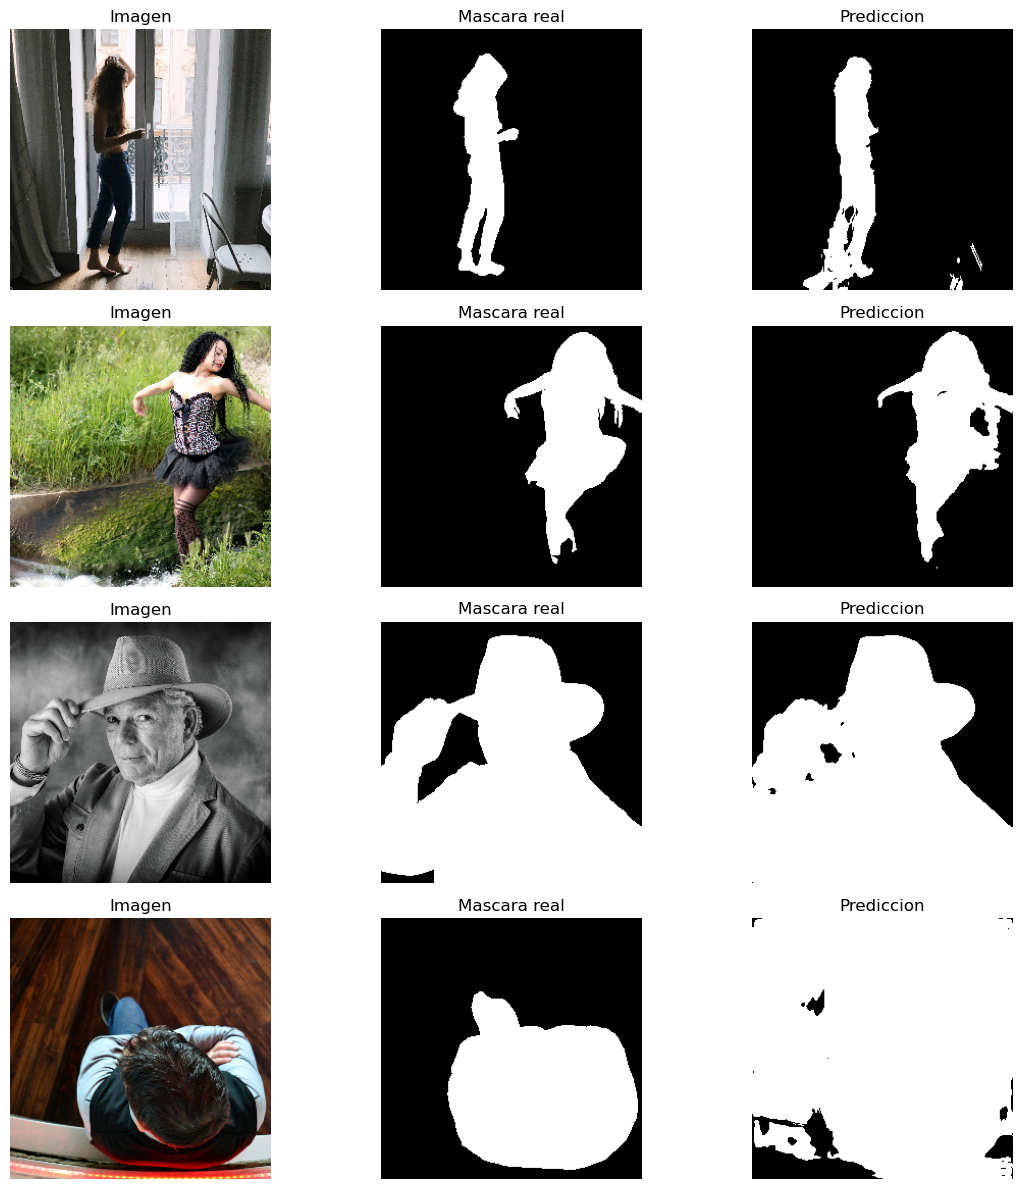

In [35]:
visualizar_predicciones(model, val_loader, device, checkpoint_path="best_unet_5.pth", n_show=4)

### Entrenamiento 6 con Unet_2
Commenzamos a probar con técnicas de DA. Con modelo Unet de 4 capas, sin dropout, con activacion ReLu y kaiming para iniciacion de pesos.

In [ ]:
train_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.HorizontalFlip(p=0.5),
    # A.VerticalFlip(p=0.2),
    # A.RandomBrightnessContrast(p=0.2),
    # A.ShiftScaleRotate(
    #     shift_limit=0.05,
    #     scale_limit=0.1,
    #     rotate_limit=15,
    #     border_mode=0,   # relleno con 0 fuera de la imagen
    #     p=0.3
    # ),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

train_dataset = SegmentationDataset(
    img_dir=TRAIN_IMG_DIR,
    mask_dir=TRAIN_MASK_DIR,
    transform=train_transform,
    filenames=train_files
)

val_dataset = SegmentationDataset(
    img_dir=TRAIN_IMG_DIR,
    mask_dir=TRAIN_MASK_DIR,
    transform=val_transform,
    filenames=val_files
)

BATCH_SIZE = 4

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

## **5. Posibles mejoras y casos borde**

## **6. Submissions a Kaggle**
Subir predicciones a la competencia de kaggle. Y reentrenamiento con raw train = train_dev + val para utilizar todos los datos disponibles.

### Modelos seleccionados para submission


In [ ]:
all_files = np.array(sorted(os.listdir(TRAIN_IMG_DIR)))

full_dataset = SegmentationDataset(
    img_dir=TRAIN_IMG_DIR,
    mask_dir=TRAIN_MASK_DIR,
    transform=train_transform,
    filenames=all_files,      
)

full_loader = DataLoader(
    full_dataset,
    batch_size=4,            
    shuffle=True,
    num_workers=0             
)

In [ ]:
best_model_path = "best_unet.pth"

model = UNet_2(
    n_channels=3,
    n_classes=1,
    base_channels=64,
    bilinear=True,
    activation="relu",
    use_dropout=False,       
    weight_init=None # None para no reiniciar pesos
).to(device)

state_dict = torch.load(best_model_path, map_location=device)
model.load_state_dict(state_dict)
model.to(device)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

history_full = train_full(
    model=model,
    loader=full_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=5  
)

torch.save(model.state_dict(), "unet_full_train.pth")

In [ ]:
model.load_state_dict(torch.load(best_model_path, map_location=device))
model.to(device)
model.eval()

test_filenames = sorted(os.listdir(TEST_IMG_DIR))

all_ids = []
all_rles = []

for fname in test_filenames:
    img_path = os.path.join(TEST_IMG_DIR, fname)
    
    img_pil = Image.open(img_path).convert("RGB") # Leer imagen original (800x800) en RGB
    img = np.array(img_pil)  # (H_orig, W_orig, 3)
    H_orig, W_orig = img.shape[:2]

    augmented = val_transform(image=img) # Aplicar el mismo transform que usamos para validación
    img_tensor = augmented["image"].unsqueeze(0).to(device) # [1, 3, H, W]

    with torch.no_grad():
        logits = model(img_tensor) # [1, 1, H_resized, W_resized]
        probs  = torch.sigmoid(logits)
        pred   = (probs > 0.5).float().cpu().numpy()[0, 0] # pred esta en la resolucion de la transformacion

    # Necesitamos llevarla a 800x800 para Kaggle
    mask_small = (pred > 0.5).astype("uint8") * 255
    mask_pil = Image.fromarray(mask_small, mode="L")
    mask_resized_pil = mask_pil.resize((W_orig, H_orig), resample=Image.NEAREST) # Redimensiona con NEAREST más prolijo
    mask_resized = np.array(mask_resized_pil)
    mask_bin = (mask_resized > 127).astype("uint8") # Fuerza mascara binaria 0/1

    rle = mask_to_rle(mask_bin)

    image_id = fname 

    all_ids.append(image_id)
    all_rles.append(rle)

submission = pd.DataFrame({
    "id": all_ids,
    "encoded_pixels": all_rles
})

submission.to_csv("submission.csv", index=False)
submission.head()

C:\Users\Octav\AppData\Local\Temp\ipykernel_13756\257075122.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_locatio

,id,encoded_pixels
0,1024.png,183179 19 183979 19 184779 19 185573 28 186373...
1,1025.png,20 3 707 10 735 63 820 3 1507 10 1535 63 1620 ...
2,1027.png,175932 16 176732 16 177532 16 178317 43 179117...
3,1037.png,129904 38 130704 38 131504 38 132304 38 133095...
4,1038.png,60532 25 61332 25 62132 25 62929 35 62998 6 63...
